In [24]:
import numpy as np

class LinearRegression:
    def __init__(self, nr_Learning_Rate=0.01, nr_Iteractions=1000):
        self.nr_Learning_Rate = nr_Learning_Rate
        self.nr_Iteractions = nr_Iteractions
        self.weights = None
        self.nr_Bias = None

    def fit(self, data, target):
        nr_Samples, nr_Features = data.shape
        self.weights = np.zeros(nr_Features)
        self.nr_Bias = 0

        for _ in range(self.nr_Iteractions):
            predicted = np.dot(data, self.weights) + self.nr_Bias

            dw = (1/nr_Samples) * np.dot(data.T, (predicted - target))
            db = (1/nr_Samples) * np.sum(predicted - target)

            self.weights -= self.nr_Learning_Rate * dw
            self.nr_Bias -= self.nr_Learning_Rate * db
    
    def predict(self, data):
        return np.dot(data, self.weights) + self.nr_Bias

    def Get_Error(self, trueTarget, predicted):
        return np.mean((trueTarget - predicted) ** 2)


506.95399263428044


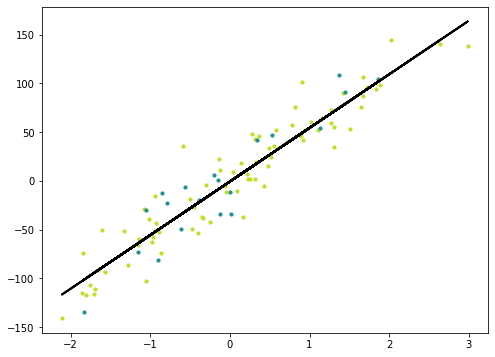

In [39]:

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data, target = datasets.make_regression(n_features=1, noise=20)
train, test, trainTarget, testTarget = train_test_split(data, target, test_size=0.2)

classifier = LinearRegression()
classifier.fit(train, trainTarget)
predicted = classifier.predict(test)

nr_Error = classifier.Get_Error(testTarget, predicted)
print(nr_Error)


cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(train, trainTarget, color=cmap(0.9), s=10)
m2 = plt.scatter(test, testTarget, color=cmap(0.5), s=10)
plt.plot(data, classifier.predict(data), color="black", linewidth=2, label="Prediction")
plt.show()